# nll-fast

In [1]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.util as util
import matplotlib.pyplot as plt
from hepi.run import nllfast as nll
# set the folder where the resummino binary can be found either in either ./{,bin,bin/build}/resummino
nll.set_path("nll-fast-3.1")
# By default hepi will run with nice -n5 to prevent overloading the system if more scans than cores are running
#rs.set_pre("") disables any prefixing with nice
print (nll.get_path())

0.2.10.6
/home/apn/git/nll-fast/nll-fast


/home/apn/git/HEPi/hepi/util.py:101: UserWarning: LHAPDF python binding not installed? Make sure you set PYTHONPATH correctly (i.e. correct python version) if you want to compute PDF uncertainties.
  warnings.warn(


Checking input:   0%|          | 0/16 [00:00<?, ?it/s]

Preparing:   0%|          | 0/16 [00:00<?, ?it/s]

Skipped: 0 Not skipped: 16


Running:   0%|          | 0/16 [00:00<?, ?it/s]

Parsing:   0%|          | 0/16 [00:00<?, ?it/s]

CPU times: user 1.27 s, sys: 101 ms, total: 1.37 s
Wall time: 1.52 s


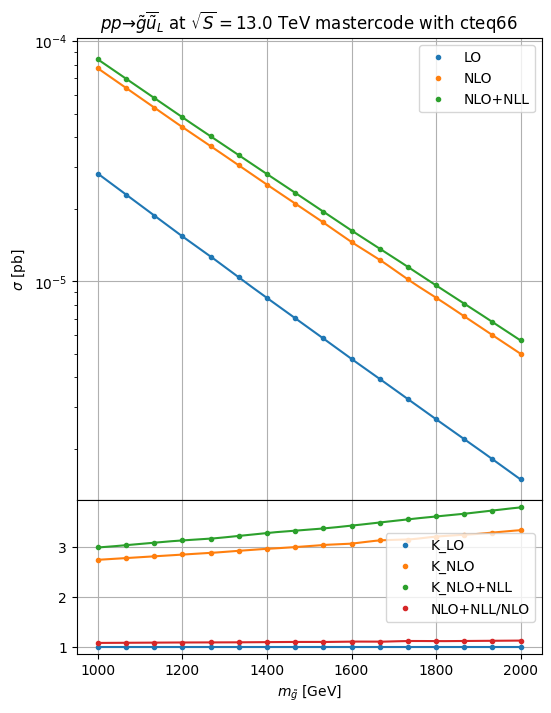

In [4]:
%%time
params = [
    "mastercode_with_gm2.in", # baseline slha file in the relative ./output folder by default unless set_output_dir was used 
]
pss = [    
      (1000021,-1000002), # Final state particles for resummino to run
     ]

for pa,pb in pss:
    for param in params:
        # All the inputs Order, CMS in GeV, particle 1, particle 2, slha, pdf_lo, pdf_nlo,mu_f, mu_r
        i = hepi.Input(hepi.Order.NLO_PLUS_NLL,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.,id=4)
        li = [i] # li is our list of inputs that we want resummino to run
        li = hepi.mass_scan([i],pa, np.linspace(1000,2000,16)) # we scan the slepton mass from 100 to 1000 at 15 equidistant points  
        rs_dl = nll.run(li,skip=False,n_jobs=1) # run resummino, skipping if the result already exists.
        # rs_dl is a panda table(dataframe) with all inputs and result 
        _,axs = hepi.init_double_plot()
        # hepi has some useful plotting routines, but the results from rs_dl can easily be accessed
        # Now plot the mass of PDG id pa from the results at LO ,NLO and aNNLO+NLL
        hepi.mass_plot(rs_dl,["LO","NLO","NLO_PLUS_NLL"],pa,axes=axs[0],tight=False)
        # Plot K factors vs LO and aNNLO+NLL/NLO
        hepi.mass_plot(rs_dl,["K_LO","K_NLO","K_NLO_PLUS_NLL","NLO_PLUS_NLL_OVER_NLO"],pa, yaxis=None, axes=axs[1],logy=False,tight=False)
        # construct a title from the inputs
        hepi.title(li[0],axs[0],scenario="mastercode")

In [5]:
rs_dl

,LO,NLO,NLO_PLUS_NLL,aNNLO_PLUS_NNLL,K_LO,K_NLO,K_NLO_PLUS_NLL,NLO_PLUS_NLL_OVER_NLO,K_aNNLO_PLUS_NNLL,aNNLO_PLUS_NNLL_OVER_NLO,...,id,model,mu,mass_1000021,runner,nf_final_state_in,nf_pdf,nf_squark_mass,nf_gluino_mass,nf_deg
0,(2.8099999999999996+/-0)e-05,(7.71+/-0)e-05,(8.4+/-0)e-05,None,1.0+/-0,2.743772241992883+/-0,2.9893238434163707+/-0,1.0894941634241246+/-0,None,None,...,4,,2535.329050,1000.000000,NLLfastRunner-?,sg,cteq,4070.6581,1000.000000,10
1,(2.3+/-0)e-05,(6.390000000000001+/-0)e-05,(6.9799999999999995+/-0)e-05,None,1.0+/-0,2.7782608695652176+/-0,3.0347826086956524+/-0,1.0923317683881064+/-0,None,None,...,4,,2568.662383,1066.666667,NLLfastRunner-?,sg,cteq,4070.6581,1066.666667,10
2,(1.88+/-0)e-05,(5.289999999999999+/-0)e-05,(5.8+/-0)e-05,None,1.0+/-0,2.8138297872340425+/-0,3.0851063829787235+/-0,1.0964083175803403+/-0,None,None,...,4,,2601.995717,1133.333333,NLLfastRunner-?,sg,cteq,4070.6581,1133.333333,10
3,(1.54+/-0)e-05,(4.39+/-0)e-05,(4.819999999999999+/-0)e-05,None,1.0+/-0,2.85064935064935+/-0,3.1298701298701297+/-0,1.0979498861047836+/-0,None,None,...,4,,2635.329050,1200.000000,NLLfastRunner-?,sg,cteq,4070.6581,1200.000000,10
4,(1.27+/-0)e-05,(3.6599999999999997+/-0)e-05,(4.02+/-0)e-05,None,1.0+/-0,2.8818897637795278+/-0,3.1653543307086616+/-0,1.0983606557377048+/-0,None,None,...,4,,2668.662383,1266.666667,NLLfastRunner-?,sg,cteq,4070.6581,1266.666667,10
5,(1.0399999999999998+/-0)e-05,(3.0399999999999996+/-0)e-05,(3.3499999999999996+/-0)e-05,None,1.0+/-0,2.9230769230769234+/-0,3.2211538461538467+/-0,1.1019736842105263+/-0,None,None,...,4,,2701.995717,1333.333333,NLLfastRunner-?,sg,cteq,4070.6581,1333.333333,10
6,(8.54+/-0)e-06,(2.53+/-0)e-05,(2.7999999999999994+/-0)e-05,None,1.0+/-0,2.9625292740046842+/-0,3.2786885245901636+/-0,1.1067193675889326+/-0,None,None,...,4,,2735.329050,1400.000000,NLLfastRunner-?,sg,cteq,4070.6581,1400.000000,10
7,(7.040000000000001+/-0)e-06,(2.11+/-0)e-05,(2.34+/-0)e-05,None,1.0+/-0,2.997159090909091+/-0,3.3238636363636362+/-0,1.1090047393364928+/-0,None,None,...,4,,2768.662383,1466.666667,NLLfastRunner-?,sg,cteq,4070.6581,1466.666667,10
8,(5.79+/-0)e-06,(1.76+/-0)e-05,(1.9499999999999997+/-0)e-05,None,1.0+/-0,3.03972366148532+/-0,3.3678756476683938+/-0,1.1079545454545454+/-0,None,None,...,4,,2801.995717,1533.333333,NLLfastRunner-?,sg,cteq,4070.6581,1533.333333,10
9,(4.760000000000001+/-0)e-06,(1.4599999999999997+/-0)e-05,(1.63+/-0)e-05,None,1.0+/-0,3.0672268907563023+/-0,3.4243697478991595+/-0,1.1164383561643836+/-0,None,None,...,4,,2835.329050,1600.000000,NLLfastRunner-?,sg,cteq,4070.6581,1600.000000,10
